In [ ]:
"""Install all relevant files, run only once!"""

!pip install matplotlib
!pip install scipy
!make && python setup.py install

Importing all libraries


In [ ]:
"""Import the relevant libraries"""
import os
import sys
import matplotlib.pyplot as plt
import scipy
# Add the path to the pfsspecsim module
sys.path.insert(0, '~/spt_ExposureTimeCalculator/python/pfsspecsim')
import pfsetc
# Add path to the gen text module
sys.path.insert(0, '~/spt_ExposureTimeCalculator/scripts/ETC_text_gen')
import generate_ETC_defaults
import generate_spectrum_defaults

In [ ]:
"""Run the exposure time calculator"""
#-----------------------------------------------------------------------------------------------------------#
#THIS IS A TEST RUN SCRIPT IF YOU WISH TO FIND THE EXPOSURE TIME FOR A SPECIFIC OBJECT USE CODE IN NEXT CELL
#IF THIS DOES NOT RUN THEN SOMETHING IS NOT INSTALLED CORRECTLY AND YOU NEED TO CHECK YOUR INSTALLATION
#-----------------------------------------------------------------------------------------------------------#
# Set the ETC variables up
etc = pfsetc.Etc()
# Set the parameters for the ETC
etc.set_param('SEEING', 0.8)
etc.set_param('ZENITH_ANGLE', 45.00)
etc.set_param('GALACTIC_EXTINCTION', 0.00)
etc.set_param('MOON_ZENITH_ANGLE', 30.0)
etc.set_param('MOON_TARGET_ANGLE', 60.0)
etc.set_param('MOON_PHASE', 0)
etc.set_param('EXP_TIME', 450)
etc.set_param('EXP_NUM', 8)
etc.set_param('FIELD_ANGLE', 0.675)
etc.set_param('MAG_FILE', 22.5)
etc.set_param('REFF', 0.3)
etc.set_param('LINE_FLUX', 1.0e-17)
etc.set_param('LINE_WIDTH', 70)
etc.set_param('OUTFILE_NOISE', 'out/ref.noise.dat')
etc.set_param('OUTFILE_SNC', 'out/ref.snc.dat')
etc.set_param('OUTFILE_SNL', 'out/ref.snl.dat')
etc.set_param('OUTFILE_OII', 'out/ref.sno2.dat')
# Run the exposure time calculator
etc.run()

In [ ]:
"""Generate the default files for the text generation script. This gives an exposure time as an output."""

#Set up the files for running the text generation script exp_time will be iterated to minimise S/N
seeing = 1.0 #Seeing in arcseconds
zenith_angle = 45.00 #Zenith angle in degrees
moon_zenith_angle = 30.0 #Moon angle from zenith
moon_target_angle = 60.0 #Moon angle from target
moon_phase = 0 #Moon phase, 0 is new moon and 1 is full moon
exp_time = 450 #Exposure time in seconds, First guess
mag_file = 22.5 #Magnitude of the object

# Run the text generation script to generate the default files


minimised_exposure_time = generate_ETC_defaults.generate_ETC_defaults(seeing, zenith_angle, moon_zenith_angle, 
                                                                      moon_target_angle,moon_phase, exp_time, mag_file)

print(f"Suggested Exposure Time: {minimised_exposure_time}")


In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scipy as sp
import sys
import os

# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(0, '/Users/quin/ExposuretimecalcHERCULES/spt_ExposureTimeCalculator/python/pfsspecsim')

import pfsetc

etc = pfsetc.Etc()

etc.set_param('EXP_TIME', 1200)
etc.set_param('EXP_NUM', 1)
etc.set_param('MAG_FILE', 5.8)
etc.set_param('SEEING', 1.5)
#Create outfiles if they dont exist
if not os.path.exists('out'):
    os.makedirs('out')
with open("out/ref.noise.dat", "w") as file:
    file.write("ref.noise.dat")
with open("out/ref.snc.dat", "w") as file:
    file.write("ref.snc.dat")
with open("out/ref.snl.dat", "w") as file:
    file.write("ref.snl.dat")
with open("out/ref.sno2.dat", "w") as file:
    file.write("ref.sno2.dat")
    
    
etc.set_param('OUTFILE_NOISE','out/ref.noise.dat')
etc.set_param('OUTFILE_SNC','out/ref.snc.dat')
etc.set_param('OUTFILE_SNL','out/ref.snl.dat')
etc.set_param('OUTFILE_OII','out/ref.sno2.dat')



#Which wavelength would you like to maximise s/n

#Say at wavelength of 560nm have a max of 550 s/n

etc.run()

# snc file
# * (4)  the continuum S/N per pixel
# print("AFTER THIUS FUCKING LINE")
# etc.make_noise_model()
# print(f"beans{etc.nsm_nois}")
# etc.make_snc()



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
##### starting to run ETC ... (it takes a few min.) #####
Compiler flags: -DHGCDTE_SUTR -DMOONLIGHT_
Fiber aperture factor [@800nm, r_eff=0.30"(exp)] = 0.38241220
Fiber aperture factor [@800nm,     point source] = 0.43305463
(1/4) Computing noise vector ...
 //Arm0//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Contribution ...done ...
 --> Done.
(2/4) Computing SNR curve for [OII] emission lines ...
      --> 100 percent done ... ...ercent done ...49 percent done ... done ... done ...  --> 94 percent done ...
 --> Done.
(3/4) Computing SNR curve for a single line with f=1.00e-17 [erg cm-2 s-1], sigma=70 [km s-1] ...
      --> 100 percent done ...one ... --> 11 percent done ...rcent done ...rcent done ...done ...     --> 44 percent done ...     --> 56 percent done ...     --> 68 percent done ...     --> 80 percent done

0

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scipy as sp
import sys
import os

# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(0, '/Users/quin/ExposuretimecalcHERCULES/spt_ExposureTimeCalculator/python/pfsspecsim')

import pfsetc

start_time = time.time()


def get_snr_at_wavelength(filename, target_wavelength, tolerance=0.5):
    data = np.loadtxt(filename)
    # Column 2 is wavelength, column 3 is S/N per pixel necessary for finding the exp time
    wavelengths = data[:, 2]
    snr_values = data[:, 3]
    
    # Find index of closest wavelength just in case the exact wavelength is not present
    idx = np.argmin(np.abs(wavelengths - target_wavelength))
    if abs(wavelengths[idx] - target_wavelength) <= tolerance:
        return snr_values[idx]
    else:
        return None

def find_exp_time_for_target_snr(etc, target_wavelength, target_snr, mag=5.8, seeing=1.5,
                                  exp_time_bounds=(10, 1800), tolerance=5):
    min_exp, max_exp = exp_time_bounds
    best_exp = None
    etc = pfsetc.Etc()
    etc.set_param('MAG_FILE', mag)
    etc.set_param('SEEING', seeing)
    etc.set_param('EXP_NUM', 1) 
    
    while min_exp <= max_exp:
        mid_exp = (min_exp + max_exp) // 2
        etc.set_param('EXP_TIME', mid_exp)
        etc.run()
        
        snr = get_snr_at_wavelength('out/ref.snc.dat', target_wavelength)
        
        if snr is None:
            print(f"Could not find wavelength near {target_wavelength} nm in output.")
        
        print(f"EXP_TIME = {mid_exp}s --> S/N = {snr:.2f} at {target_wavelength}nm")
        
        if abs(snr - target_snr) <= tolerance:
            best_exp = mid_exp
            break
        elif snr < target_snr:
            min_exp = mid_exp + 1
        else:
            max_exp = mid_exp - 1
    
    return best_exp

# Define the target wavelength and desired S/N
target_wavelength = 560  # in nm
target_snr = 550 # Desired signal-to-noise ratio
seeing = 1.5  # in arcseconds based on average Mt John seeing conditions

best_time = find_exp_time_for_target_snr(etc, target_wavelength, target_snr)

if best_time:
    print(f"\nOptimal exposure time: {best_time} seconds for S/N ≈ {target_snr} at {target_wavelength} nm.")
else:
    print("Could not determine a suitable exposure time.")

end_time = time.time()

print(f"ETC run time: {end_time - start_time:.2f} seconds")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
##### starting to run ETC ... (it takes a few min.) #####
Compiler flags: -DHGCDTE_SUTR -DMOONLIGHT_
Fiber aperture factor [@800nm, r_eff=0.30"(exp)] = 0.38241220
Fiber aperture factor [@800nm,     point source] = 0.43305463
(1/4) Computing noise vector ...
 //Arm0//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Contribution ...
 --> Done.
(2/4) Computing SNR curve for [OII] emission lines ...
      --> 100 percent done ......--> 49 percent done ...    --> 57 percent done ...nt done ...  --> 94 percent done ...
 --> Done.
(3/4) Computing SNR curve for a single line with f=1.00e-17 [erg cm-2 s-1], sigma=70 [km s-1] ...
      --> 100 percent done ...--> 11 percent done ...done ...ent done ...ne ...ne ... ...
 --> Done.
(4/4) Computing SNR curve for continuum ...
      --> 33 percent done ... --> 10 percent done ...done ..

In [18]:
for test_time in [600, 900, 1200, 1500, 1800]:
    etc.set_param('EXP_TIME', test_time)
    etc.set_param('EXP_NUM', 1)
    etc.set_param('MAG_FILE', 5.8)
    etc.set_param('SEEING', 1.5)
    etc.run()
    snr = get_snr_at_wavelength('out/ref.snc.dat', 560)
    print(f"EXP_TIME = {test_time} --> S/N at 560nm = {snr:.2f}")


##### starting to run ETC ... (it takes a few min.) #####
Compiler flags: -DHGCDTE_SUTR -DMOONLIGHT_
Fiber aperture factor [@800nm, r_eff=0.30"(exp)] = 0.38241220
Fiber aperture factor [@800nm,     point source] = 0.43305463
(1/4) Computing noise vector ...
 //Arm0//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Contribution ...> 89 percent done ...
 --> Done.
(2/4) Computing SNR curve for [OII] emission lines ...
      --> 100 percent done ......e ...33 percent done ...39 percent done ...59 percent done ... done ...79 percent done ... done ...  --> 94 percent done ...
 --> Done.
(3/4) Computing SNR curve for a single line with f=1.00e-17 [erg cm-2 s-1], sigma=70 [km s-1] ...
      --> 100 percent done ...nt done ...-> 9 percent done ... --> 11 percent done ... ...done ...done ...8 percent done ...     --> 56 percent done ...0 percent done ...done ...8 percent done ...4 percent done ...0 percent done ... .

In [ ]:
# def find_exp_time_with_max_snr(mag=5.8, seeing=1.5, target_wavelength=560, step=100, max_exp=1800):
#     best_snr = -np.inf
#     best_time = None
    
#     for exp_time in range(10, max_exp + 1, step):
#         etc = pfsetc.Etc()
#         etc.set_param('MAG_FILE', mag)
#         etc.set_param('SEEING', seeing)
#         etc.set_param('EXP_NUM', 1)
#         etc.set_param('EXP_TIME', exp_time)
#         etc.run()
        
#         snr = get_snr_at_wavelength('out/ref.snc.dat', target_wavelength)
        
#         if snr is None:
#             print(f"Could not find wavelength near {target_wavelength} nm.")
#             continue
        
#         print(f"EXP_TIME = {exp_time}s --> S/N = {snr:.2f}")
        
#         if snr > best_snr:
#             best_snr = snr
#             best_time = exp_time
            
#     return best_time, best_snr

# Install relevant libaries and make the ETC configuration files

In [3]:
"""Install all relevant files, run only once!"""

!pip install matplotlib
!pip install scipy
!make && python setup.py install


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
make: *** No targets specified and no makefile found.  Stop.


# Import all libraries for running the ETC

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""Import the relevant libraries"""
import os
import sys
import matplotlib.pyplot as plt
import scipy
import numpy as np
import time
from pathlib import Path

!pwd
# Add the path to the pfsspecsim module
# sys.path.insert(0, '~/spt_ExposureTimeCalculator/python/pfsspecsim')
# sys.path.append(str(Path(sys.prefix).parent / 'local/lib'))

# Expand and insert the absolute path
sys.path.insert(0, str(Path('~/spt_ExposureTimeCalculator/python/pfsspecsim').expanduser()))

!which python
import pfsetc

# Add path to the gen text module
# sys.path.insert(0, '~/spt_ExposureTimeCalculator/scripts/ETC_text_gen')
# import generate_ETC_defaults
# import generate_spectrum_defaults

/Users/quin/ExposuretimecalcHERCULES/spt_ExposureTimeCalculator/scripts
/Users/quin/ExposuretimecalcHERCULES/spt_ExposureTimeCalculator/venv/bin/python


# How to run the exposure time calculator (ETC)

- Enter the Magnitude of the star in "magnitude" variable
- Enter the seeing conditions if known in "seeing" variable (Default = 1.5)
- If required change "target_wavelength" and "target_snr" (Default = 560nm and 550 S/R)

Code will take 2-5 minutes to run. If needed a S/R curve can be calculated in the next cell.


# Run cell below then move on to the next

In [14]:
#Second test full run through
start_time = time.time()

#Define the functions for getting the S/N at a specific wavelength and finding the exposure time for a target S/N
def get_snr_at_wavelength(filename, target_wavelength, tolerance=0.5):
    data = np.loadtxt(filename)
    # Column 2 is wavelength, column 3 is S/N per pixel necessary for finding the exp time
    wavelengths = data[:, 2]
    snr_values = data[:, 3]
    
    # Find index of closest wavelength just in case the exact wavelength is not present
    idx = np.argmin(np.abs(wavelengths - target_wavelength))
    if abs(wavelengths[idx] - target_wavelength) <= tolerance:
        return snr_values[idx]
    else:
        return None

def find_min_exp_time_for_target_snr(mag=5.8, seeing=1.5, target_wavelength=560, 
                                     target_snr=550, step=100, min_exp=10, max_exp=1800):
    for exp_time in range(min_exp, max_exp + 1, step):
        # print(step)
        etc = pfsetc.Etc()
        etc.set_param('MAG_FILE', mag)
        etc.set_param('SEEING', seeing)
        etc.set_param('EXP_NUM', 1)
        etc.set_param('EXP_TIME', exp_time)
        etc.run()
        
        snr = get_snr_at_wavelength('out/ref.snc.dat', target_wavelength)
        
        if snr is None:
            print(f"Could not find S/N near {target_wavelength} nm.")
            continue
        
        print(f"EXP_TIME = {exp_time}s --> S/N = {snr:.2f}")
        
        if snr >= target_snr:
            print(f" Reached target S/N ≥ {target_snr} at {exp_time}s")
            return exp_time, snr
    
    print(f"Target S/N of {target_snr} not reached within {max_exp}s limit.")
    return max_exp, snr  # Fall back to max allowed time


# Define the target wavelength and desired S/N
target_wavelength = 560  # in nm
# target_snr = 550 # Desired signal-to-noise ratio
target_snr = 6000
seeing = 1.5  # in arcseconds based on average Mt John seeing conditions
# magnitude = 5.2  # Example magnitude for the target object takes 5 min
# magnitude = 7.2 took 15 minutes
# magnitude = 6.9
magnitude = 1.92 #not bad took about 2 minutes needs smaller step size might make some conditions for step size
# best_time = 0
# step = 10


if magnitude >= 6.5:
    print(f"magnitude >= 6.5")
    # For very dim objects, start with a larger minimum exposure time
    min_exp = 1200  # Minimum exposure time for very dim objects
    step = 200  # Larger step size for very dim objects
    best_time, snr = find_min_exp_time_for_target_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength,target_snr=target_snr, step=step, min_exp=min_exp, max_exp=1800)
elif 6.5 > magnitude >= 5.5:
    print(f"magnitude >= 5.5")
    min_exp = 1200  # Minimum exposure time for dim objects
    step = 100  # Larger step size for dim objects
    best_time, snr = find_min_exp_time_for_target_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength,target_snr=target_snr, step=step, min_exp=min_exp, max_exp=1800)
elif 3 <= magnitude < 5.5:
    print(f"magnitude between 3 and 5.5")
    # For brighter objects, start with a smaller minimum exposure time 
    min_exp = 10
    step = 50  # Smaller step size for brighter objects
    best_time, snr = find_min_exp_time_for_target_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength,target_snr=target_snr, step=step, min_exp=min_exp, max_exp=1800)
elif magnitude < 3:
    print(f"Magnitude < 3")
    # For very bright objects, start with a very small minimum exposure time
    min_exp = 10
    step = 10
    best_time, snr = find_min_exp_time_for_target_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength,target_snr=target_snr, step=step, min_exp=min_exp, max_exp=1800)


# best_time, best_snr = find_exp_time_with_max_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength, step=100, max_exp=1800)
# best_time, snr = find_min_exp_time_for_target_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength,target_snr=target_snr, step=step, min_exp=10, max_exp=1800)

print(f"\nSelected EXP_TIME = {best_time}s gives S/N = {snr:.2f} at 560nm")

# if best_time:
#     print(f"\nMaximum S/N = {best_snr:.2f} at {target_wavelength} nm is achieved with EXP_TIME = {best_time} seconds.")
# else:
#     print("Could not find a valid exposure time.")


if best_time:
    print(f"\nOptimal exposure time: {best_time} seconds for S/N ≈ {snr:.2f} at {target_wavelength} nm.")
else:
    print("Could not determine a suitable exposure time.")

end_time = time.time()
time_taken = (end_time - start_time)/60

print(f"ETC run time: {time_taken:.2f} minute")


Magnitude < 3
##### starting to run ETC ... (it takes a few min.) #####
Compiler flags: -DHGCDTE_SUTR -DMOONLIGHT_
Fiber aperture factor [@800nm, r_eff=0.30"(exp)] = 0.20055492
Fiber aperture factor [@800nm,     point source] = 0.23493511
(1/4) Computing noise vector ...
 //Arm0//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Contribution ... ...cent done ...cent done ...
 //Arm1//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Contribution ......
 //Arm2//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Contribution ...done ...  --> 67 percent done ...
 --> Done.
(2/4) Computing SNR curve for [OII] emission lines ...
      --> 100 percent done ... --> 1 percent done ...one ...one ...nt done ...> 38 percent done ...  --> 44 percent done ...ercent don

# Change and run this for a good exposure time

In [ ]:
start_time = time.time()
#Setup the variables for running the exposure time calculator
target_wavelength = 560  # in nm
target_snr = 550 # Desired signal-to-noise ratio


seeing = 1.5  # in arcseconds based on average Mt John seeing conditions
magnitude = 1.92 #This is the only variable that must change

#Run the exposre time calculator with the given parameters
if magnitude >= 5.5:
    min_exp = 1200  # Minimum exposure time for dim objects
    step = 100  # Larger step size for dim objects
    best_time, snr = find_min_exp_time_for_target_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength,target_snr=target_snr, step=step, min_exp=min_exp, max_exp=1800)
elif 3 >= magnitude > 5.5:
    # For brighter objects, start with a smaller minimum exposure time 
    min_exp = 10
    step = 50  # Smaller step size for brighter objects
    best_time, snr = find_min_exp_time_for_target_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength,target_snr=target_snr, step=step, min_exp=min_exp, max_exp=1800)
else:
    # For very bright objects, start with a very small minimum exposure time
    min_exp = 10
    step = 10
    besdt_time, snr = find_min_exp_time_for_target_snr(mag=magnitude, seeing=seeing,target_wavelength=target_wavelength,target_snr=target_snr, step=step, min_exp=min_exp, max_exp=1800)


# SNR vs Exposure time curve

Enter the Magnitufe and Seeing and run, will give a SNR vs exposure time curve at that given wavelength

##### starting to run ETC ... (it takes a few min.) #####
  --> Computing Sky Systematic Error Contribution ...
 //Arm2//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
    Compiler flags: -DHGCDTE_SUTR -DMOONLIGHT_e ...
Fiber aperture factor [@800nm, r_eff=0.30"(exp)] = 0.20055492
Fiber aperture factor [@800nm,     point source] = 0.23493511
(1/4) Computing noise vector ...
 //Arm0//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Contribution ...t done ...
 --> Done.
(2/4) Computing SNR curve for [OII] emission lines ...
  --> Computing Sky Systematic Error Contribution ...
 //Arm1//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Contribution ...
 //Arm2//
  --> Computing Sky Lines Contribution ...
  --> Computing Sky Continuum Contribution ...
  --> Computing Sky Systematic Error Cont

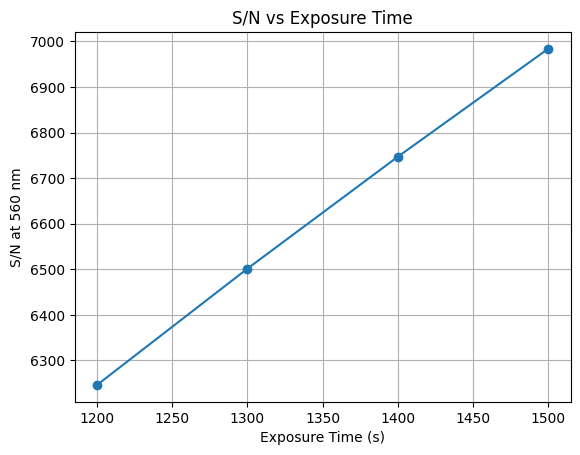

In [8]:
exptimes = []
snrs = []

for exp_time in range(1200, 1600, 100):
    etc = pfsetc.Etc()
    etc.set_param('MAG_FILE', 5.8)
    etc.set_param('SEEING', 1.5)
    etc.set_param('EXP_NUM', 1)
    etc.set_param('EXP_TIME', exp_time)
    etc.run()
    
    snr = get_snr_at_wavelength('out/ref.snc.dat', 560)
    exptimes.append(exp_time)
    snrs.append(snr)

plt.plot(exptimes, snrs, marker='o')
plt.xlabel("Exposure Time (s)")
plt.ylabel("S/N at 560 nm")
plt.title("S/N vs Exposure Time")
plt.grid(True)
plt.show()

#This is the second one which idk doesnt work?
# exptimes = []
# snrs = []

# magnitude = 5.2  # Example magnitude for the target object
# seeing = 1.5  # in arcseconds based on average Mt John seeing conditions
# target_wavelength = 560  # in nm

# # Loop through a range of exposure times to find S/N at 560 nm
# for exp_time in range(500, 1200, 100):
#     etc = pfsetc.Etc()
#     etc.set_param('MAG_FILE', magnitude)
#     etc.set_param('SEEING', seeing)
#     etc.set_param('EXP_NUM', 1)
#     etc.set_param('EXP_TIME', exp_time)
#     etc.run()
    
#     snr = get_snr_at_wavelength('out/ref.snc.dat', target_wavelength)
#     exptimes.append(exp_time)
#     snrs.append(snr)

# plt.plot(exptimes, snrs, marker='o')
# plt.xlabel("Exposure Time (s)")
# plt.ylabel("S/N at 560 nm")
# plt.title("S/N vs Exposure Time")
# plt.grid(True)
# plt.show()